In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

# Second Degree Equations Part 4
### Cool Applications of Second Degree Equations!

## But First: Example Word Problems

We want to build a fence enclosing a $12 \text{m}^2$ rectangle. If the width of the rectangle is 4 more than its length, how much fence do we need?

Let $$x = \text{length of rectangle}$$

We know that the area is length$\cdot$width. So

\begin{gather}
    x(x+4) = 12 \\
    x^2 + 4x = 12 \\
    x^2 + 4x - 12 = 0 \\
\end{gather}

Now we can solve two ways. We can use the quadratic equation
\begin{gather}
    x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \\
    x = \frac{-4 \pm \sqrt{64}}{2} \\
    x = 2, -6
\end{gather}


Or we can factor directly
\begin{gather}
    x^2 + 4x - 12 = 0 \\
    (x + 6)(x-2) = 0
    \rightarrow x=-6, 2
\end{gather}

We take $x = 2$ (since lengths must be positive) and find the permiter is $$\boxed{P = 2 + 2 + 6 + 6 = 16}$$

## A second word problem

In seven years, Mario will be five more than the square of his current age. How old is Mario?

Let $$x = \text{the current age of Mario}$$

We are solving the following equation for $x$
\begin{gather}
    x^2 +  5 = x + 7 \\
    x^2 - x - 2 = 0  \\
    (x-2)(x+1) = 0 \rightarrow x = 2, -1
\end{gather}

Mario is $2$ years old!

## Some Cool Applications of Second Degree Equations

## Linear Regression
Let's say we recorded the following data.

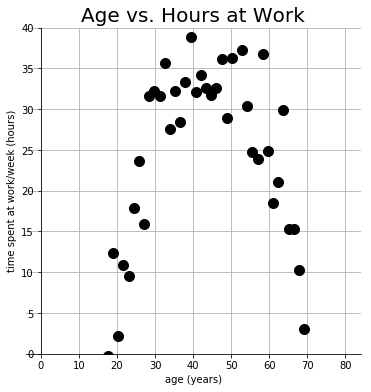

In [239]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.grid(True)
    
    ax.set_ylim([0, 40])
    #ax.set_xlim([0, 50])
    
    ax.set_xlabel("age (years)")
    ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 80)
        fit_y = np.polyval(fit, fit_x)

        ax.plot(fit_x, fit_y)
    
    
x = np.linspace(0, 80, 60)
y = -0.05*x**2 + 4.4*x -60
np.random.seed(1)
noise = np.random.normal(0, 6, 60)
y = y +  noise
plot(x,y, False)

It looks like we can possibly model this with a parabola!

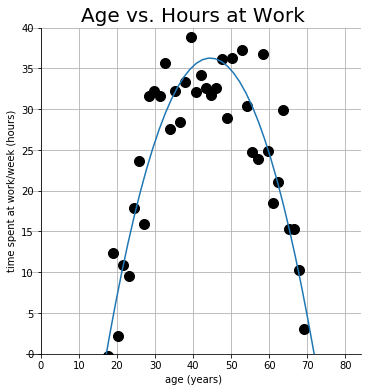

In [240]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.grid(True)
    
    ax.set_ylim([0, 40])
    #ax.set_xlim([0, 50])
    
    ax.set_xlabel("age (years)")
    ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 80)
        fit_y = np.polyval(fit, fit_x)

        ax.plot(fit_x, fit_y)
    
    
x = np.linspace(0, 80, 60)
y = -0.05*x**2 + 4.4*x -60
np.random.seed(1)
noise = np.random.normal(0, 6, 60)
y = y +  noise
plot(x,y, True)

Let's learn how the computer figures out this fit!

## Error
We need to figure out a way to measure how "bad" a fit is. Let's say we have a guess to our answer and want to calculate how bad one point is.

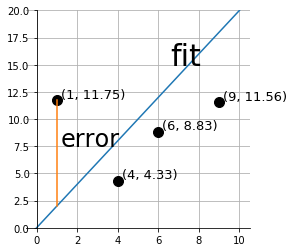

In [243]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111)
    #ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    for i in range(len(x)):
        ax.annotate("(" + str(np.round(x[i], 2)) + ", "  + str(np.round(y[i], 2))+ ")", (x[i]+0.2, y[i]+0.2), fontsize=13)
          
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.annotate("fit", (6.6, 15), fontsize="30")
    
    
    ax.grid(True)
    
    ax.set_ylim([0, 20])
    #ax.set_xlim([0, 50])
    
    #ax.set_xlabel("age (years)")
    #ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        #fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 10)
        fit_y = 2*fit_x

        ax.plot(fit_x, fit_y)
        
        # Draw error of one point
        x_error = np.array([1, 1])
        y_error = np.array([y[0], 2*x[0]])
        ax.plot(x_error, y_error)
        ax.annotate("error", (1.2, 7.5), fontsize=24)
    
    
x = np.array([1, 4, 6, 9])
y = 2*x
np.random.seed(1)
noise = np.random.normal(0, 6, 4)
y = y +  noise
plot(x,y, True)

If our point is located at $\left(x_i, y_i)\right)$ then we can calculate the error as 

$$\text{error} = \left(y_i - fit(x_i)\right)^2$$

Why is this squared?

## Error
We can calculate how bad a fit is by summing up the error of each point! 

$$\text{badness} = \sum_{\text{all points}} \left(y_i - fit(x_i)\right)^2$$

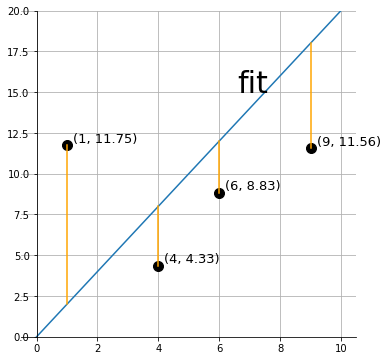

In [242]:
def plot(x, y, plot_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    #ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    
    for i in range(len(x)):
        ax.annotate("(" + str(np.round(x[i], 2)) + ", "  + str(np.round(y[i], 2))+ ")", (x[i]+0.2, y[i]+0.2), fontsize=13)
          
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.annotate("fit", (6.6, 15), fontsize="30")
    
    
    ax.grid(True)
    
    ax.set_ylim([0, 20])
    #ax.set_xlim([0, 50])
    
    #ax.set_xlabel("age (years)")
    #ax.set_ylabel("time spent at work/week (hours)")
    
    
    if plot_fit:
        #fit = np.polyfit(x, y, 2)

        fit_x = np.linspace(0, 10)
        fit_y = 2*fit_x

        ax.plot(fit_x, fit_y)
        
        for i in range(len(x)):
            # Draw error of one point
            x_error = np.array([x[i], x[i]])
            y_error = np.array([y[i], 2*x[i]])
            ax.plot(x_error, y_error, color="orange")
            #ax.annotate("error", (1.2, 7.5), fontsize=24)
    
    
x = np.array([1, 4, 6, 9])
y = 2*x
np.random.seed(1)
noise = np.random.normal(0, 6, 4)
y = y +  noise
plot(x,y, True)

Our goal is to **_find a fit that minimizes badness_**.

## Machine Learning
Given our original data set, we want our computer to figure out the values for $a$ $b$ and $c$ for a parabola that minimizes badness. $$fit = ax^2 + bx + c$$

The process of figuring out these values is callled _linear regression_, which is a topic of _machine learning_. 

Learning the exact way machines do this is a complicated topic, but just know there's many many different methods to do this.

[-0.00319276  0.41906994  0.01441503]


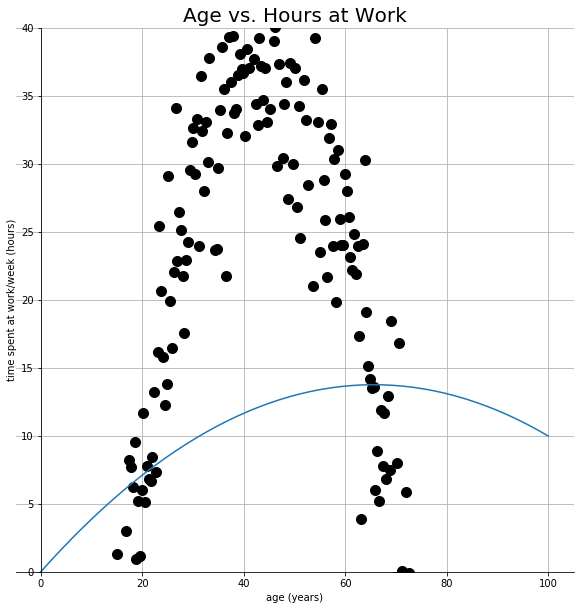

In [233]:
def plot(x, y, x_fit, y_fit):
    #x = np.array([point[0] for point in data])
    #y = np.array([point[1] for point in data])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title("Age vs. Hours at Work", fontsize=20)
    ax.plot(x, y, marker='o', markersize=10, linewidth=0, color="black")
    ax.plot(x_fit, y_fit)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.grid(True)
    
    ax.set_ylim([0, 40])
    #ax.set_xlim([0, 50])
    
    ax.set_xlabel("age (years)")
    ax.set_ylabel("time spent at work/week (hours)")
    
    
    
    

def perceptron(x, y, iters=6000, eta=0.0001, lam=0):
    x_original = x
    th = np.array([-1, 0, 0])
    #th0 = np.array([0])
    x = np.array([np.array([i**2, i, 1]).T for i in x]).T
    
    for i in range(iters):
        if i > 3:
            eta = 0.0000001
        sigma = np.array([0, 0, 0])
        for j in range(x.shape[1]):
            sigma = sigma + (np.dot(th, x[:, j]) - y[j])*x[:, j]
            
        dth = 2/x.shape[1]*sigma + 2*lam*th
        th = th - eta*dth
        #print(th)
        #th0 = th0 - eta*2/x.shape[1]*sigma0
        #print(th0)
        
    print(th)
    #print(th0)
    x_fit = np.linspace(0, 100)
    x_fit_new = np.array([np.array([i**2, i, 1]).T for i in x_fit]).T
    y_fit = np.dot(th, x_fit_new)
    plot(x_original,y, x_fit, y_fit)
    
        
    
x = np.linspace(10, 80, 200)
y = -0.05*x**2 + 4.4*x -60
np.random.seed(1)
noise = np.random.normal(0, 6, 200)
y = y +  noise
perceptron(x, y)

## Projectile Motion

When things are thrown into the air, they follow a parabolic arc!

![](https://i.imgur.com/IoYK8sx.png)

$$y = -\frac{1}{2}gt^2 + v_0t + y_0$$ where $$g = \text{acceleration due to gravity  } (9.8)$$ $$v_0 = \text{initial velocity in y-direction}$$ $$y_0 = \text{initial y position}$$

## Example Projectile Motion

A ball is thrown upwards at $3$ meters/second at a height of $2$ meters above the ground. How long does it take to hit the ground?

We have $v_0 = 3$, $y_0 = 2$, and we are solving for when $y=0$

\begin{gather}
    y = -\frac{1}{2}gt^2 + v_0t + y_0 \\
    0 = -\frac{1}{2}(9.8)t^2 + 3t + 2 \\
\end{gather}

Now we can use the quadratic equation to find $t$!

\begin{gather}
    t = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \\
    t = \frac{-3 \pm \sqrt{3^2 - 4(-4.9)(2)}}{2(-4.9)} \\
    t = 1.01,  -0.4
\end{gather}

Our answer is $$\boxed{t = 1.01 \text{ seconds}}$$

## Parabolas in Real Life

Parabolas are everywhere!

<div id="left" style="text-align:center">

<img src="https://cdn.zmescience.com/wp-content/uploads/2016/01/TFDGubq.png" style="width:200px" />


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdlP0aByuN3yDuT_XRfMLCpkpzNBLa8RIMm2yj5r6unsD1tdeD" style="width:200px" />

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTH_TNZIvzKUSS_ZWC4UBltxYUu0RzZcMfoM9YdLPTc4R3ztzqM" style="width:200px" />

</div>

<div id="right">
         <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSp2lPICdnnHb_8-l2XxN_5RiokBUXit63F06Wunj4ERxLiMIr9" style="width:200px" />
    
   <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQm3uG6cMbkGgIWSGbA7nvV139UEBQH-v4KRRcx5Cff-gJmk0f9Ig" style="width:200px" />
   
   <img src="https://i.ytimg.com/vi/OP1Ac_BNnyo/maxresdefault.jpg" style="width:200px" />
    
 </div>

## Paraboloid


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Paraboloid_of_Revolution.svg/640px-Paraboloid_of_Revolution.svg.png?1548008701778" style="width: 400px"/>

$$z = x^2 + y^2$$

Imagine we rotated a parabola $360^{\circ}$ around the $y$ axis. 

## Paraboloids in Real Life

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUvAVFPBjlQX8ot0gkKvfWx1hYIx4gtE1cHDJkzTAtpOGFG4kmjw)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_WlWiOUDmsanYpFbKDKm5Zlv2DsS3yINfo4os0W0hg6UwZnoR)

## Wrapping Up

* We learned a lot about how to solve second degree equations in the past 3 lessons
* Mathematics is more than just learning how to solve an equation, though
* Every day, people are using the math that you learn to solve real world problems and create real things
* Parabolas occur in the world far more often then you'd think! Keep an eye out for them!

It's been very fun teaching you all. Thank you for a great three weeks!